In [1]:
from nsepython import nsefetch
import datetime as dt
import pandas as pd
import yfinance as yf

In [2]:
symbol="TATACOFFEE"
start=dt.datetime(2021,6,1)
end=dt.datetime(2022,1,5)
url=f"https://www.nseindia.com/api/historical/cm/equity?symbol={symbol}&series=[%22EQ%22]&from={start}&to={end}"
data=nsefetch(url)
#tc_stk=pd.DataFrame(data)
if "data" in data and isinstance(data["data"], list):
    df = pd.DataFrame(data["data"])
    print(df.head())
else:
    print("No data returned — check symbol, date range, or network access.")

No data returned — check symbol, date range, or network access.


In [3]:
data = yf.download("RELIANCE.NS", start="2021-06-01", end="2022-01-05")
#print(data.head())


C:\Users\jerli\AppData\Local\Temp\ipykernel_1836\2116394712.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download("RELIANCE.NS", start="2021-06-01", end="2022-01-05")
[*********************100%***********************]  1 of 1 completed


In [17]:
filename="Reliance Share Data.csv"
data.to_csv(filename)

In [4]:
data

Price,Close,High,Low,Open,Volume
Ticker,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS
Date,,,,,
2021-06-01,983.447144,998.455709,973.290233,982.132164,28013832
2021-06-02,998.115601,1001.856408,978.051248,978.051248,24630162
2021-06-03,1001.924377,1020.220331,995.780410,1007.070776,23974257
2021-06-04,993.241150,1005.007662,990.407180,1004.259500,14468646
2021-06-07,1009.972717,1016.592831,990.747259,998.455613,16336573
...,...,...,...,...,...
2021-12-29,1093.166504,1100.674201,1083.884183,1087.933863,15425312
2021-12-30,1073.418945,1094.281271,1067.276305,1092.028961,29333171


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 150 entries, 2021-06-01 to 2022-01-04
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   (Close, RELIANCE.NS)   150 non-null    float64
 1   (High, RELIANCE.NS)    150 non-null    float64
 2   (Low, RELIANCE.NS)     150 non-null    float64
 3   (Open, RELIANCE.NS)    150 non-null    float64
 4   (Volume, RELIANCE.NS)  150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 7.0 KB


In [6]:
#just remembering the code 
quan=[]
qual=[]
for i in data.columns:
    if data[i].dtypes=="obj":
        qual.append(i)
    else:
        quan.append(i)

In [7]:
data[quan]

Price,Close,High,Low,Open,Volume
Ticker,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS
Date,,,,,
2021-06-01,983.447144,998.455709,973.290233,982.132164,28013832
2021-06-02,998.115601,1001.856408,978.051248,978.051248,24630162
2021-06-03,1001.924377,1020.220331,995.780410,1007.070776,23974257
2021-06-04,993.241150,1005.007662,990.407180,1004.259500,14468646
2021-06-07,1009.972717,1016.592831,990.747259,998.455613,16336573
...,...,...,...,...,...
2021-12-29,1093.166504,1100.674201,1083.884183,1087.933863,15425312
2021-12-30,1073.418945,1094.281271,1067.276305,1092.028961,29333171


In [8]:
data.describe()

Price,Close,High,Low,Open,Volume
Ticker,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS
count,150.000000,150.000000,150.000000,150.000000,1.500000e+02
mean,1062.296580,1074.101438,1051.851420,1063.900185,1.458498e+07
std,86.090304,88.059705,84.129400,86.476622,9.640998e+06
min,926.086060,936.414733,917.417960,934.594621,1.705656e+06
25%,983.559189,994.474246,972.593135,980.434355,9.784558e+06
50%,1077.070374,1089.924384,1067.845015,1078.856224,1.208794e+07
75%,1129.709595,1137.410611,1116.969100,1130.079333,1.575945e+07
max,1243.024536,1251.897291,1232.172556,1247.984274,9.146198e+07


In [9]:
import numpy as np
np.percentile(data["Low"],50)

1067.845014876335

In [10]:
def get_pdf(dataset,start_range,end_range):
    from scipy.stats import norm
    mean=dataset.mean()
    std=dataset.std()
    dist=norm(mean,std)
    prb=[dist.pdf(v) for v in range(start_range,end_range)]
    probability=np.sum(prb)
    print("Mean:{}\nSandard Deviation: {}".format(mean,std))
    print("PDF between the range {} and {}: {:.3f}".format(start_range,end_range,probability))

    import matplotlib.pyplot as plt
    import seaborn as sns
    sns.distplot(dataset,kde=True,kde_kws={'color':'blue'},color="Green")
    plt.axvline(start_range,color='red')
    plt.axvline(end_range,color='red')
    plt.show()
    return probability

Mean:Ticker
RELIANCE.NS    1051.85142
dtype: float64
Sandard Deviation: Ticker
RELIANCE.NS    84.1294
dtype: float64
PDF between the range 900 and 1200: 0.925


C:\Users\jerli\AppData\Local\Temp\ipykernel_1836\219483275.py:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset,kde=True,kde_kws={'color':'blue'},color="Green")


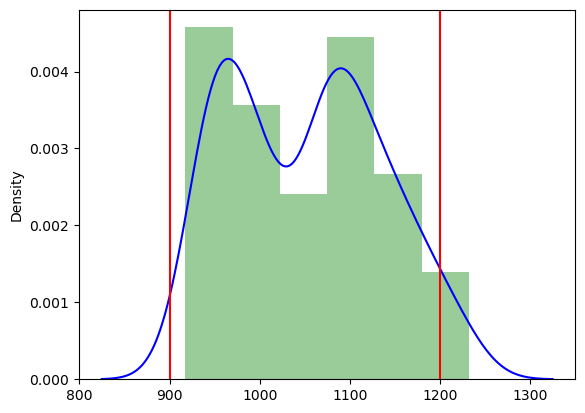

0.9252967651192002

In [11]:
get_pdf(data["Low"],900,1200)

In [12]:
def freq_table(dataset, column):
    import pandas as pd
    counts = dataset[column].value_counts()
    frq_table = pd.DataFrame({"Unique Values": counts.index,"Frequency": counts.values,"Relative Frequency": counts.values / len(dataset[column])})
    frq_table["Cumulative Frequency"] = frq_table["Relative Frequency"].cumsum()
    return frq_table


In [13]:
freq_table(data,"Low")

,Unique Values,Frequency,Relative Frequency,Cumulative Frequency
0,"(917.4179602018662,)",1,0.006667,0.006667
1,"(1084.7486779581968,)",1,0.006667,0.013333
2,"(1091.2326692117995,)",1,0.006667,0.020000
3,"(1091.6192015688714,)",1,0.006667,0.026667
4,"(1092.0287445657639,)",1,0.006667,0.033333
...,...,...,...,...
145,"(991.9717199859176,)",1,0.006667,0.973333
146,"(993.9054594499104,)",1,0.006667,0.980000
147,"(995.7804103170117,)",1,0.006667,0.986667
148,"(996.7099374722953,)",1,0.006667,0.993333


In [14]:
fh=freq_table(data,"High")
fh.sort_values(by="Frequency",ascending=False)

fhs=fh[fh["Frequency"]==1]["Unique Values"].sort_values(ascending=False)

In [15]:
fh["Frequency"].mode()

0    1
Name: Frequency, dtype: int64

In [16]:
fhs

149    (1251.8972908980181,)
54     (1249.0079672854492,)
53     (1247.9842743668398,)
52     (1241.2728114223185,)
51      (1237.632749168865,)
               ...          
99      (948.1085383406385,)
98      (946.1520117827725,)
97      (943.8768809146474,)
38      (940.9421660372899,)
0        (936.414732655119,)
Name: Unique Values, Length: 150, dtype: object